## Importing Libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Importing nltk and vader lexicons
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading data from the drive
train_df = pd.read_csv("/content/drive/MyDrive/yelp_review_dataset/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/yelp_review_dataset/test_dataset.csv")

In [ ]:
# labels 0: Negative, 1: Postive 
# train set first 10 rows
train_df.head(5)

,Unnamed: 0,text,label
0,0,"Unfortunately, the frustration of being Dr. Go...",0
1,1,Been going to Dr. Goldberg for over 10 years. ...,1
2,2,I don't know what Dr. Goldberg was like before...,0
3,3,I'm writing this review to give you a heads up...,0
4,4,All the food is great here. But the best thing...,1


##Implementing VADER Sentiment Analysis

In [ ]:
# calling sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()
print(sia)

In [ ]:
"""1.Finding polarity for test set.
   2.Computing compound score.
   3.Classify to class""" 
test_df["polarity_scores"] = test_df['text'].apply(lambda text: sia.polarity_scores(text))
test_df["compound"]  = test_df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
test_df["class"] = test_df['compound'].apply(lambda c: 1 if c >=0 else 0)

In [ ]:
# print first 10 rows
test_df.head(10)

,text,label,polarity_scores,compound,class
0,"Contrary to other reviews, I have zero complai...",1,"{'neg': 0.083, 'neu': 0.826, 'pos': 0.09, 'com...",-0.0258,0
1,Last summer I had an appointment to get new ti...,0,"{'neg': 0.145, 'neu': 0.761, 'pos': 0.094, 'co...",-0.4339,0
2,"Friendly staff, same starbucks fair you get an...",1,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.6705,1
3,The food is good. Unfortunately the service is...,0,"{'neg': 0.179, 'neu': 0.725, 'pos': 0.096, 'co...",-0.5046,0
4,Even when we didn't have a car Filene's Baseme...,1,"{'neg': 0.017, 'neu': 0.812, 'pos': 0.171, 'co...",0.9633,1
5,"Picture Billy Joel's \""""Piano Man\"""" DOUBLED m...",1,"{'neg': 0.03, 'neu': 0.728, 'pos': 0.242, 'com...",0.9917,1
6,Mediocre service. COLD food! Our food waited s...,0,"{'neg': 0.135, 'neu': 0.801, 'pos': 0.064, 'co...",-0.3802,0
7,Ok! Let me tell you about my bad experience fi...,0,"{'neg': 0.073, 'neu': 0.795, 'pos': 0.132, 'co...",0.9621,1
8,I used to love D&B when it first opened in the...,0,"{'neg': 0.096, 'neu': 0.771, 'pos': 0.133, 'co...",0.8145,1
9,"Like any Barnes & Noble, it has a nice comfy c...",1,"{'neg': 0.019, 'neu': 0.676, 'pos': 0.305, 'co...",0.9646,1


In [ ]:
#  displaying text
test_df["text"][0]

"Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \\nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \\nAnd they just renovated the waiting room. It looks a lot better than it did in previous years."

In [ ]:
# displaying polarity scores
test_df["polarity_scores"][0]

{'compound': -0.0258, 'neg': 0.083, 'neu': 0.826, 'pos': 0.09}

In [ ]:
# finding values in each class
test_df["class"].value_counts()

1    29182
0     8818
Name: class, dtype: int64

# Model Evaluation

1. Classification report.
2. Confusion Matrix
3. Plotting confusion matrix

In [ ]:
# classification report
target_names = ['class 0', 'class 1']
cls_rep = classification_report(test_df["label"], test_df["class"], target_names = target_names)
print(cls_rep)

              precision    recall  f1-score   support

     class 0       0.95      0.44      0.60     19000
     class 1       0.63      0.98      0.77     19000

    accuracy                           0.71     38000
   macro avg       0.79      0.71      0.68     38000
weighted avg       0.79      0.71      0.68     38000



In [ ]:
# confusion matrix
cm= confusion_matrix(test_df["label"], test_df["class"])
print(cm)

[[ 8346 10654]
 [  472 18528]]


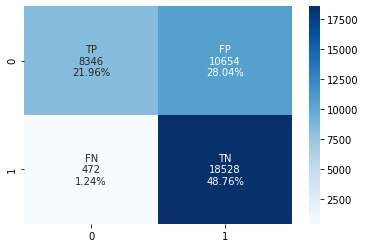

In [ ]:
# Plotting confusion matrix
"""TP: True Postive
   FP: False Negative
   FN: False Negative
   TN: True Negative
   In the test data Postive and Negative classes are 50/50"""

group_names = ["TP","FP","FN","TN"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
print ("End of the note book. \nThe next notebook will be Yelp sentiment analysis with Machine learning")

End of the note book. 
The next notebook will be Yelp sentiment analysis with Machine learning
